# Trabajo Práctico 5

# Imports

In [1]:
import gc
import os
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
# install TF similarity if needed
try:
    import tensorflow_similarity as tfsim  # main package
except ModuleNotFoundError:
    !pip install tensorflow_similarity
    import tensorflow_similarity as tfsim
import tensorflow_similarity.visualization as tfsim_visualization
import tensorflow_similarity.losses as tfsim_losses
from tabulate import tabulate

tfsim.utils.tf_cap_memory()

# Clear out any old model state.
gc.collect()
tf.keras.backend.clear_session()

c:\Users\Certi\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ejercicio 1

## Entrenamiento

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 418,506 (1.60 MB)

 Trainable params: 418,506 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3097 - loss: 1.8425 - val_accuracy: 0.5358 - val_loss: 1.2824
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5506 - loss: 1.2409 - val_accuracy: 0.6126 - val_loss: 1.0894
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.6392 - loss: 1.0085 - val_accuracy: 0.6718 - val_loss: 0.9436
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7022 - loss: 0.8406 - val_accuracy: 0.6905 - val_loss: 0.8842
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7451 - loss: 0.7202 - val_accuracy: 0.7069 - val_loss: 0.8507
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.7800 - loss: 0.6378 - val_accuracy: 0.6817 - val_loss: 0.9312
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8088 - loss: 0.5481 - val_accuracy: 0.7134 - val_loss: 0.8913
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 0.8326 -

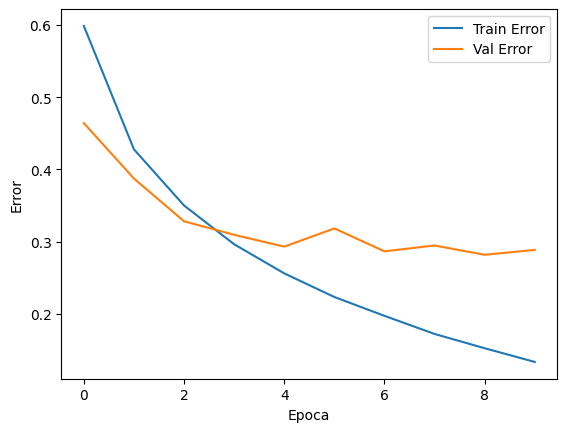

313/313 - 1s - 5ms/step - accuracy: 0.7037 - loss: 1.0160


Error en test: 0.2962999939918518


In [ ]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoca')
plt.ylabel('Error')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

## Análisis

# Ejercicio 2

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
dropout_vals = [0.2, 0.5]
models_one_dropout = {}
models_two_dropout = {}

## Una capa de Dropout

In [ ]:
for rate in dropout_vals:
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
    model.add(layers.Dropout(rate))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10))

    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

    models_one_dropout[rate] = {'model': model, 'history': history}

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.2876 - loss: 1.8873 - val_accuracy: 0.5143 - val_loss: 1.3289
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5471 - loss: 1.2455 - val_accuracy: 0.6223 - val_loss: 1.0779
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6366 - loss: 1.0171 - val_accuracy: 0.6692 - val_loss: 0.9370
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6926 - loss: 0.8765 - val_accuracy: 0.6974 - val_loss: 0.8687
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7284 - loss: 0.7696 - val_accuracy: 0.7116 - val_loss: 0.8305
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7591 - loss: 0.6849 - val_accuracy: 0.7148 - val_loss: 0.8487
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7868 - loss: 0.6062 - val_accuracy: 0.7178 - val_loss: 0.8247
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8027 -

## Dos capas de Dropout

In [ ]:
for rate in dropout_vals:
    for rate2 in dropout_vals:
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
        model.add(layers.Dropout(rate))
        model.add(layers.Flatten())
        model.add(layers.Dense(64, activation='relu'))
        model.add(layers.Dropout(rate2))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(10))

        model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

        history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

        models_two_dropout[(rate, rate2)] = {'model': model, 'history': history}

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.2743 - loss: 1.9070 - val_accuracy: 0.4647 - val_loss: 1.4360
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4951 - loss: 1.3703 - val_accuracy: 0.5736 - val_loss: 1.2035
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.5862 - loss: 1.1586 - val_accuracy: 0.6260 - val_loss: 1.0643
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6477 - loss: 0.9908 - val_accuracy: 0.6696 - val_loss: 0.9445
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.6799 - loss: 0.8943 - val_accuracy: 0.6851 - val_loss: 0.9136
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7164 - loss: 0.8103 - val_accuracy: 0.6906 - val_loss: 0.8885
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7320 - loss: 0.7544 - val_accuracy: 0.7015 - val_loss: 0.8690
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7584 -

## Gráfico y test errors

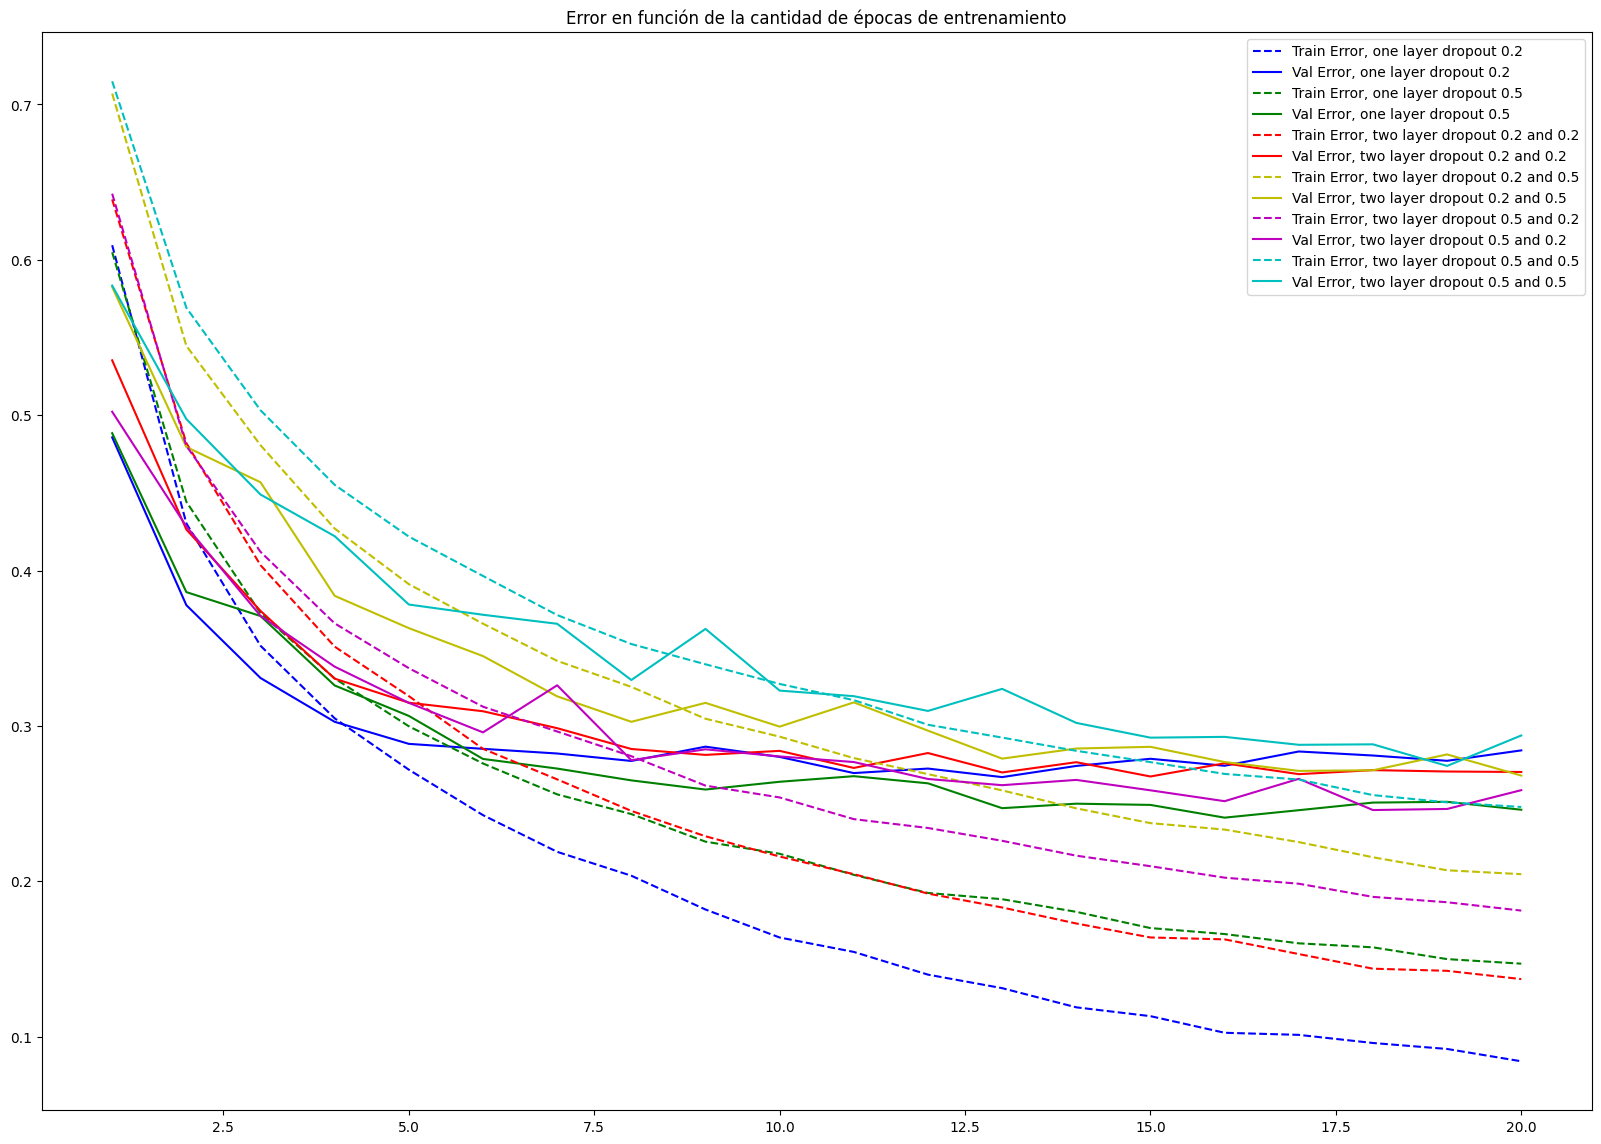

In [ ]:
ranges = range(1, 21)
colors=['b', 'g', 'r', 'y', 'm', 'c']
i_color = 0
plt.figure(figsize=(20, 14))
for r, m in models_one_dropout.items():
    plt.plot(ranges, [1-a for a in m['history'].history['accuracy']], label=f'Train Error, one layer dropout {r}', linestyle='--', color=colors[i_color])
    plt.plot(ranges, [1-a for a in m['history'].history['val_accuracy']], label=f'Val Error, one layer dropout {r}', linestyle='-', color=colors[i_color])
    i_color += 1

for (r1, r2), m in models_two_dropout.items():
    plt.plot(ranges, [1-a for a in m['history'].history['accuracy']], label=f'Train Error, two layer dropout {r1} and {r2}', linestyle='--', color=colors[i_color])
    plt.plot(ranges, [1-a for a in m['history'].history['val_accuracy']], label=f'Val Error, two layer dropout {r1} and {r2}', linestyle='-', color=colors[i_color])
    i_color += 1

plt.title(f'Error en función de la cantidad de épocas de entrenamiento')
plt.legend()

In [ ]:
for r, m in models_one_dropout.items():
    test_loss, test_acc = m['model'].evaluate(test_images,  test_labels, verbose=2)
    print(f"Error en test, one layer dropout {r}: {1-test_acc}")
    print("\n")

for (r1, r2), m in models_two_dropout.items():
    test_loss, test_acc = m['model'].evaluate(test_images,  test_labels, verbose=2)
    print(f"Error en test, two layer dropout {r1} and {r2}: {1-test_acc}")
    print("\n")

313/313 - 2s - 5ms/step - accuracy: 0.7059 - loss: 1.1438
Error en test, one layer dropout 0.2: 0.29409998655319214


313/313 - 2s - 5ms/step - accuracy: 0.7455 - loss: 0.8156
Error en test, one layer dropout 0.5: 0.25449997186660767


313/313 - 2s - 6ms/step - accuracy: 0.7110 - loss: 0.9159
Error en test, two layer dropout 0.2 and 0.2: 0.2889999747276306


313/313 - 2s - 5ms/step - accuracy: 0.7215 - loss: 0.8268
Error en test, two layer dropout 0.2 and 0.5: 0.2785000205039978


313/313 - 2s - 5ms/step - accuracy: 0.7418 - loss: 0.7832
Error en test, two layer dropout 0.5 and 0.2: 0.2581999897956848


313/313 - 2s - 6ms/step - accuracy: 0.6993 - loss: 0.9076
Error en test, two layer dropout 0.5 and 0.5: 0.30070000886917114




## Análisis
0.5 y 0.2 menos sobreajuste a pesar de un poco peor resultado

# Ejercicio 3

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
img_height = 32
img_width = 32
data_augmentation = keras.Sequential(
    [
          layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
          layers.RandomRotation(0.1),
          layers.RandomZoom(0.1),
     ]
)

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = models.Sequential()
model.add(data_augmentation)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 19ms/step - accuracy: 0.2288 - loss: 2.0536 - val_accuracy: 0.4020 - val_loss: 1.6283
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4026 - loss: 1.6129 - val_accuracy: 0.4866 - val_loss: 1.4178
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.4624 - loss: 1.4697 - val_accuracy: 0.5174 - val_loss: 1.3560
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.4880 - loss: 1.4071 - val_accuracy: 0.5444 - val_loss: 1.2633
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5102 - loss: 1.3485 - val_accuracy: 0.5557 - val_loss: 1.2815
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5409 - loss: 1.2884 - val_accuracy: 0.5758 - val_loss: 1.1768
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5507 - loss: 1.2535 - val_accuracy: 0.5895 - val_loss: 1.1641
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.5619 -

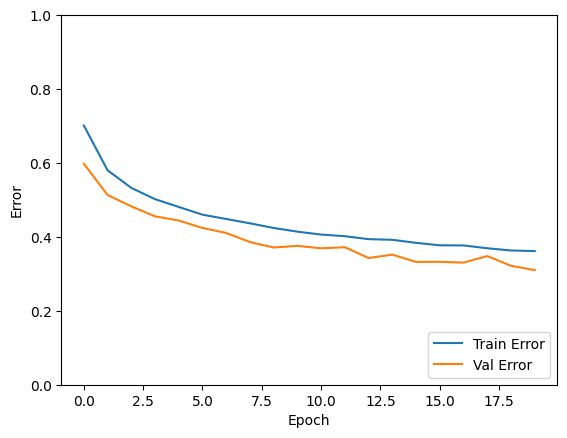

313/313 - 2s - 6ms/step - accuracy: 0.6782 - loss: 0.9349


Error en test: 0.32179999351501465


In [ ]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

# Ejercicio 4

## Primer intento de mejora

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.2515 - loss: 1.9623 - val_accuracy: 0.4808 - val_loss: 1.4027
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4921 - loss: 1.3954 - val_accuracy: 0.6007 - val_loss: 1.1186
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.5818 - loss: 1.1667 - val_accuracy: 0.6482 - val_loss: 0.9992
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.6443 - loss: 1.0078 - val_accuracy: 0.6860 - val_loss: 0.8941
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.6817 - loss: 0.9024 - val_accuracy: 0.7174 - val_loss: 0.8144
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.7081 - loss: 0.8355 - val_accuracy: 0.7156 - val_loss: 0.8223
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7360 - loss: 0.7670 - val_accuracy: 0.7388 - val_loss: 0.7605
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.7481 -

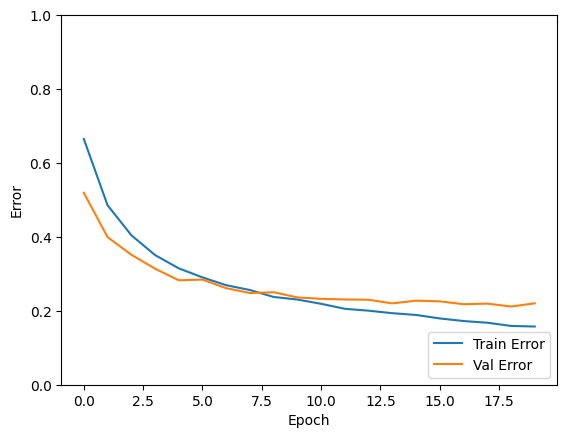

313/313 - 3s - 8ms/step - accuracy: 0.7781 - loss: 0.6768


Error en test: 0.22189998626708984


In [ ]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

## Segundo intento

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10))

c:\Users\Certi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, validation_split=0.2)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.2166 - loss: 2.0560 - val_accuracy: 0.3860 - val_loss: 1.6511
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.4458 - loss: 1.4961 - val_accuracy: 0.5429 - val_loss: 1.2347
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.5329 - loss: 1.2829 - val_accuracy: 0.6072 - val_loss: 1.1002
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.5944 - loss: 1.1454 - val_accuracy: 0.6381 - val_loss: 1.0193
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.6226 - loss: 1.0642 - val_accuracy: 0.6621 - val_loss: 0.9729
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.6471 - loss: 0.9978 - val_accuracy: 0.6817 - val_loss: 0.9225
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.6718 - loss: 0.9344 - val_accuracy: 0.6944 - val_loss: 0.8626
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.6988 -

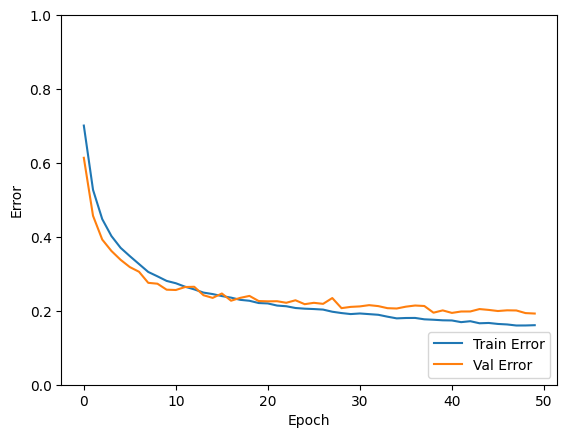

313/313 - 3s - 9ms/step - accuracy: 0.8053 - loss: 0.6726


Error en test: 0.19470000267028809


In [ ]:
plt.plot([1-a for a in history.history['accuracy']], label='Train Error')
plt.plot([1-a for a in history.history['val_accuracy']], label = 'Val Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\n")
print(f"Error en test: {1-test_acc}")

# Ejercicio 5

## Preparacion de datos

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size = 0.2, random_state=0)

In [4]:
# Clases 6 y 7 son frog y horse
CLASSES = [0, 1, 2, 3, 4, 5, 8, 9, 6, 7]
NUM_CLASSES = 8 
CLASSES_PER_BATCH = NUM_CLASSES
EXAMPLES_PER_CLASS = 10 
STEPS_PER_EPOCH = 1000 

sampler = tfsim.samplers.MultiShotMemorySampler(
     train_images,
     train_labels,
     classes_per_batch=CLASSES_PER_BATCH,
     examples_per_class_per_batch=EXAMPLES_PER_CLASS,
     class_list=CLASSES[:NUM_CLASSES]  
)


The initial batch size is 80 (8 classes * 10 examples per class) with 0 augmentations


indexing classes: 100%|██████████| 31952/31952 [00:00<00:00, 3195126.87it/s]


## Entrenamiento de Similarity model

In [5]:
def get_model_sim():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(inputs)
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Dropout(0.5)(x)
  x = tf.keras.layers.Flatten()(x)
  # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
  outputs = tfsim.layers.MetricEmbedding(128)(x)
  return tfsim.models.SimilarityModel(inputs, outputs)

model_sim = get_model_sim()
model_sim.summary()

Model: "similarity_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                  

In [6]:
def get_model_sim_2():
  inputs = tf.keras.layers.Input(shape=(32, 32, 3))
  x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1)(inputs)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.MaxPooling2D((2, 2))(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1)(x)
  x = tf.keras.layers.Flatten()(x)
  # smaller embeddings will have faster lookup times while a larger embedding will improve the accuracy up to a point.
  outputs = tfsim.layers.MetricEmbedding(64)(x)
  return tfsim.models.SimilarityModel(inputs, outputs)

model_sim_2 = get_model_sim_2()
model_sim_2.summary()

Model: "similarity_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                           

In [7]:
distance = "cosine"  # @param ["cosine", "L2", "L1"]{allow-input: false}
loss = tfsim_losses.MultiSimilarityLoss(distance=distance)

In [8]:
LR = 0.000005  # @param {type:"number"}
model_sim.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [9]:
model_sim_2.compile(optimizer=tf.keras.optimizers.Adam(LR), loss=loss)

Distance metric automatically set to cosine use the distance arg to override.


In [10]:
EPOCHS = 30  # @param {type:"integer"}
history_sim = model_sim.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))

Epoch 1/30
1000/1000 [==============================] - 138s 136ms/step - loss: 1.3031 - val_loss: 0.9077
Warmup complete
Epoch 2/30
1000/1000 [==============================] - 135s 135ms/step - loss: 1.3009 - val_loss: 0.9032
Epoch 3/30
1000/1000 [==============================] - 134s 134ms/step - loss: 1.2992 - val_loss: 0.8942
Epoch 4/30
1000/1000 [==============================] - 136s 136ms/step - loss: 1.2976 - val_loss: 0.8891
Epoch 5/30
1000/1000 [==============================] - 135s 135ms/step - loss: 1.2963 - val_loss: 0.8855
Epoch 6/30
1000/1000 [==============================] - 136s 136ms/step - loss: 1.2948 - val_loss: 0.8808
Epoch 7/30
1000/1000 [==============================] - 135s 135ms/step - loss: 1.2934 - val_loss: 0.8761
Epoch 8/30
1000/1000 [==============================] - 136s 136ms/step - loss: 1.2920 - val_loss: 0.8726
Epoch 9/30
1000/1000 [==============================] - 135s 135ms/step - loss: 1.2906 - val_loss: 0.8690
Epoch 10/30
1000/1000 [=======

In [ ]:
EPOCHS = 20  # @param {type:"integer"}
history_sim_2 = model_sim_2.fit(sampler, steps_per_epoch=STEPS_PER_EPOCH, epochs=EPOCHS, validation_data=(val_images, val_labels))

Epoch 1/20
1000/1000 [==============================] - 83s 82ms/step - loss: 1.3095 - val_loss: 0.8379
Epoch 2/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.3016 - val_loss: 0.8286
Epoch 3/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2988 - val_loss: 0.8271
Epoch 4/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2969 - val_loss: 0.8249
Epoch 5/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2951 - val_loss: 0.8206
Epoch 6/20
1000/1000 [==============================] - 81s 81ms/step - loss: 1.2938 - val_loss: 0.8202
Epoch 7/20
1000/1000 [==============================] - 83s 83ms/step - loss: 1.2927 - val_loss: 0.8168
Epoch 8/20
1000/1000 [==============================] - 87s 87ms/step - loss: 1.2912 - val_loss: 0.8165
Epoch 9/20
1000/1000 [==============================] - 91s 91ms/step - loss: 1.2903 - val_loss: 0.8137
Epoch 10/20
1000/1000 [==============================] - 97s 97m

In [ ]:
save_index=False

In [ ]:
# save the model and the index
save_path = "models/tf_sim"  # @param {type:"string"}
model_sim.save(save_path, save_index=save_index)

INFO:tensorflow:Assets written to: models/tf_sim\assets


INFO:tensorflow:Assets written to: models/tf_sim\assets


The index was not saved with the model. The save_index param is set to False.


In [ ]:
# save the model and the index
save_path_2 = "models/tf_sim_2"  # @param {type:"string"}
model_sim_2.save(save_path_2, save_index=save_index)

INFO:tensorflow:Assets written to: models/tf_sim_2\assets


INFO:tensorflow:Assets written to: models/tf_sim_2\assets


The index was not saved with the model. The save_index param is set to False.


In [ ]:
# reload the model
model_sim = tf.keras.models.load_model(
    save_path,
    custom_objects={"SimilarityModel": tfsim.models.SimilarityModel},
)
# reload the index
if save_index:
    model_sim.load_index(save_path)

Distance metric automatically set to cosine use the distance arg to override.


In [ ]:
# reload the model
model_sim_2 = tf.keras.models.load_model(
    save_path_2,
    custom_objects={"SimilarityModel": tfsim.models.SimilarityModel},
)
# reload the index
if save_index:
    model_sim_2.load_index(save_path_2)

In [ ]:
x_index, y_index = tfsim.samplers.select_examples(train_images, train_labels, CLASSES, 20)
model_sim.reset_index()
model_sim.index(x_index, y_index, data=x_index)
model_sim_2.reset_index()
model_sim_2.index(x_index, y_index, data=x_index)

gather examples: 100%|██████████| 200/200 [00:00<?, ?it/s]

[Indexing 200 points]
|-Computing embeddings
1/7 [===>..........................] - ETA: 0s

7/7 [==============================] - 0s 13ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.
[Indexing 200 points]
|-Computing embeddings
7/7 [==============================] - 0s 10ms/step
|-Storing data points in key value store
|-Adding embeddings to index.
|-Building index.


In [ ]:
num_calibration_samples = 1000
calibration_sim = model_sim.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1
)

calibration_sim_2 = model_sim_2.calibrate(
    train_images[:num_calibration_samples],
    train_labels[:num_calibration_samples],
    extra_metrics=["precision", "recall", "binary_accuracy"],
    verbose=1
)

32/32 [==============================] - 0s 15ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 1000.13it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.478517    0.118343     0.320904  0.940397              0.284  0.478517


32/32 [==============================] - 0s 10ms/step

Performing NN search



Evaluating: 100%|██████████| 4/4 [00:00<00:00, 2001.34it/s]


 name        value    distance    precision    recall    binary_accuracy        f1
-------  --------  ----------  -----------  --------  -----------------  --------
optimal  0.572555    0.224449     0.409707  0.950262              0.363  0.572555


## Entrenamiento red

In [ ]:
model_red_1 = models.Sequential()
model_red_1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model_red_1.add(layers.MaxPooling2D((2, 2)))
model_red_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_1.add(layers.MaxPooling2D((2, 2)))
model_red_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_1.add(layers.Flatten())
model_red_1.add(layers.Dense(64, activation='relu'))
model_red_1.add(layers.Dense(128, activation='relu'))
model_red_1.add(layers.Dense(128, activation='relu'))
model_red_1.add(layers.Dense(10))

In [ ]:
model_red_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_red_1 = model_red_1.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
1000/1000 [==============================] - 46s 45ms/step - loss: 1.7190 - accuracy: 0.3563 - val_loss: 1.3717 - val_accuracy: 0.4922
Epoch 2/10
1000/1000 [==============================] - 44s 44ms/step - loss: 1.2719 - accuracy: 0.5372 - val_loss: 1.1425 - val_accuracy: 0.5928
Epoch 3/10
1000/1000 [==============================] - 45s 45ms/step - loss: 1.0723 - accuracy: 0.6177 - val_loss: 1.0413 - val_accuracy: 0.6319
Epoch 4/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.9146 - accuracy: 0.6748 - val_loss: 0.9989 - val_accuracy: 0.6526
Epoch 5/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.8046 - accuracy: 0.7164 - val_loss: 0.9345 - val_accuracy: 0.6760
Epoch 6/10
1000/1000 [==============================] - 44s 44ms/step - loss: 0.7038 - accuracy: 0.7513 - val_loss: 0.9470 - val_accuracy: 0.6740
Epoch 7/10
1000/1000 [==============================] - 46s 46ms/step - loss: 0.6140 - accuracy: 0.7825 - val_loss: 0.9304 -

In [ ]:
model_red_4 = models.Sequential()
model_red_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same", strides=1))
model_red_4.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.MaxPooling2D((2, 2)))
model_red_4.add(layers.Dropout(0.2))
model_red_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.MaxPooling2D((2, 2)))
model_red_4.add(layers.Dropout(0.2))
model_red_4.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", strides=1))
model_red_4.add(layers.MaxPooling2D((2, 2)))
model_red_4.add(layers.Dropout(0.5))
model_red_4.add(layers.Flatten())
model_red_4.add(layers.Dense(128, activation='relu'))
model_red_4.add(layers.Dropout(0.2))
model_red_4.add(layers.Dense(256, activation='relu'))
model_red_4.add(layers.Dense(256, activation='relu'))
model_red_4.add(layers.Dense(10))

In [ ]:
model_red_4.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history_red_4 = model_red_4.fit(train_images, train_labels, epochs=50, validation_data=(val_images, val_labels))

Epoch 1/50
1250/1250 [==============================] - 111s 88ms/step - loss: 1.8186 - accuracy: 0.3099 - val_loss: 1.5171 - val_accuracy: 0.4370
Epoch 2/50
1250/1250 [==============================] - 106s 84ms/step - loss: 1.4411 - accuracy: 0.4694 - val_loss: 1.2711 - val_accuracy: 0.5327
Epoch 3/50
1250/1250 [==============================] - 108s 86ms/step - loss: 1.2807 - accuracy: 0.5359 - val_loss: 1.1349 - val_accuracy: 0.5881
Epoch 4/50
1250/1250 [==============================] - 108s 86ms/step - loss: 1.1663 - accuracy: 0.5843 - val_loss: 1.0450 - val_accuracy: 0.6313
Epoch 5/50
1250/1250 [==============================] - 103s 83ms/step - loss: 1.0855 - accuracy: 0.6164 - val_loss: 0.9882 - val_accuracy: 0.6483
Epoch 6/50
1250/1250 [==============================] - 104s 83ms/step - loss: 1.0231 - accuracy: 0.6396 - val_loss: 0.9427 - val_accuracy: 0.6685
Epoch 7/50
1250/1250 [==============================] - 106s 85ms/step - loss: 0.9674 - accuracy: 0.6603 - val_loss: 0

## Gráficos y resultados

In [ ]:
labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "Unknown"]
num_examples_per_class = 1000
cutpoint = "optimal"

313/313 [==============================] - 4s 14ms/step


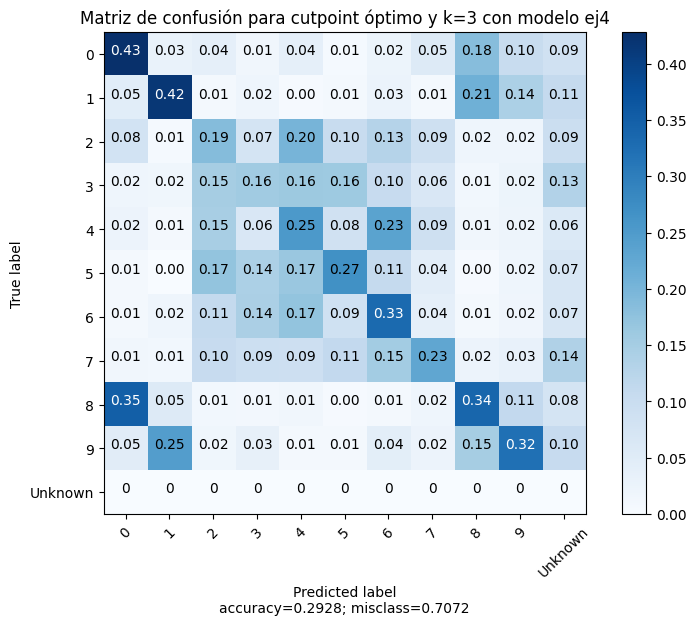

In [ ]:
matches_sim_3 = model_sim.match(test_images, cutpoint=cutpoint, no_match_label=10, k=3)
cm_sim_3 = tfsim_visualization.confusion_matrix(
    matches_sim_3,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=3 con modelo ej4",
)

313/313 [==============================] - 3s 10ms/step


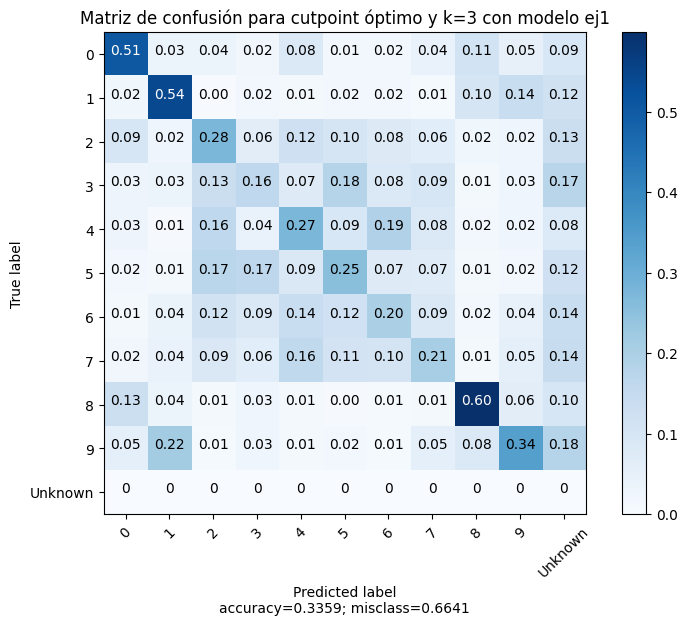

In [ ]:
matches_sim_2_3 = model_sim_2.match(test_images, cutpoint=cutpoint, no_match_label=10, k=3)
cm_sim_2_3 = tfsim_visualization.confusion_matrix(
    matches_sim_2_3,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=3 con modelo ej1",
)

313/313 [==============================] - 4s 14ms/step


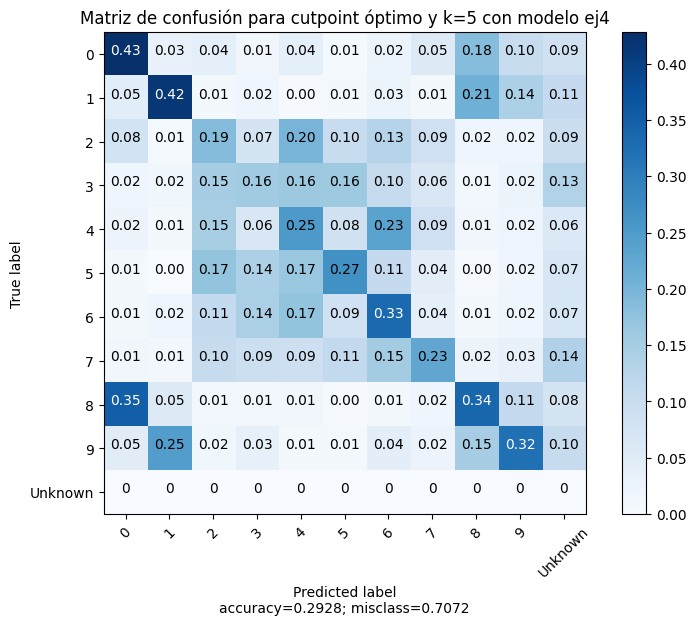

In [ ]:
matches_sim_5 = model_sim.match(test_images, cutpoint=cutpoint, no_match_label=10, k=5)
cm_sim_5 = tfsim_visualization.confusion_matrix(
    matches_sim_5,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=5 con modelo ej4",
)

313/313 [==============================] - 3s 11ms/step


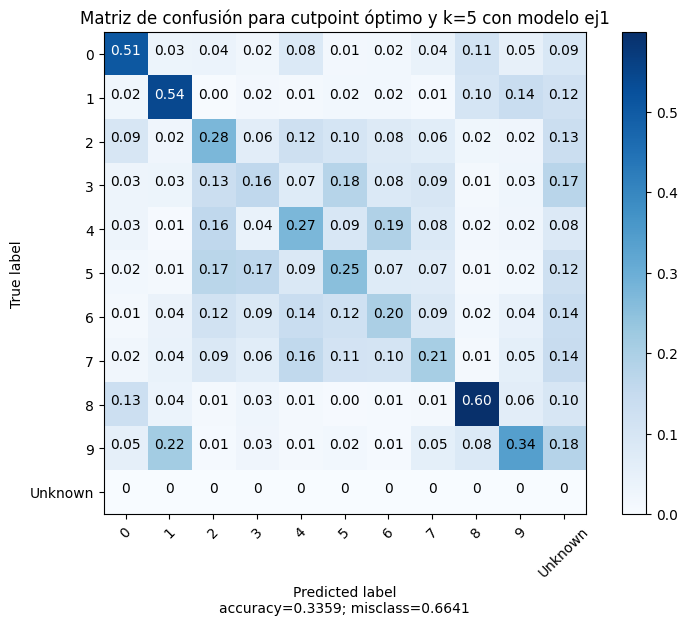

In [ ]:
matches_sim_2_5 = model_sim_2.match(test_images, cutpoint=cutpoint, no_match_label=10, k=5)
cm_sim_2_5 = tfsim_visualization.confusion_matrix(
    matches_sim_2_5,
    test_labels,
    labels=labels,
    title="Matriz de confusión para cutpoint óptimo y k=5 con modelo ej1",
)

313/313 [==============================] - 3s 10ms/step


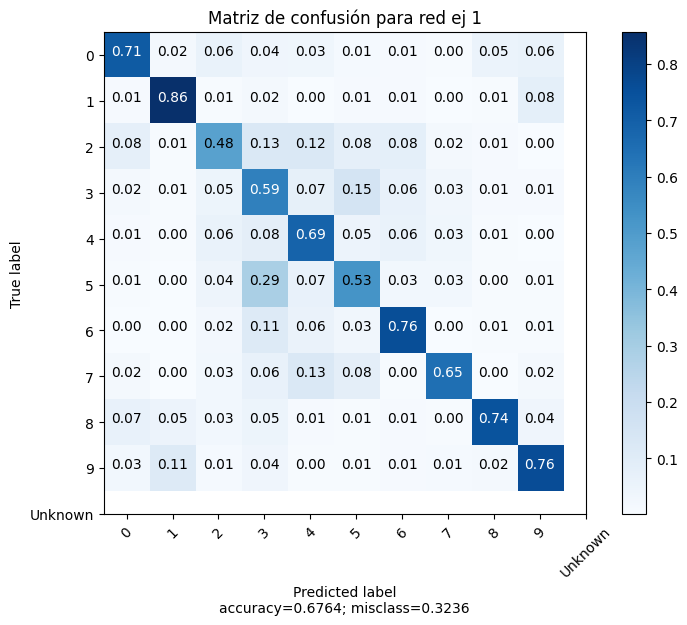

In [ ]:
matches_red_1 = model_red_1.predict(test_images)
matches_red_1 = matches_red_1.argmax(axis=1)
cm_sim_2_5 = tfsim_visualization.confusion_matrix(
    matches_red_1,
    test_labels,
    labels=labels,
    title="Matriz de confusión para red ej 1",
)

313/313 [==============================] - 6s 18ms/step


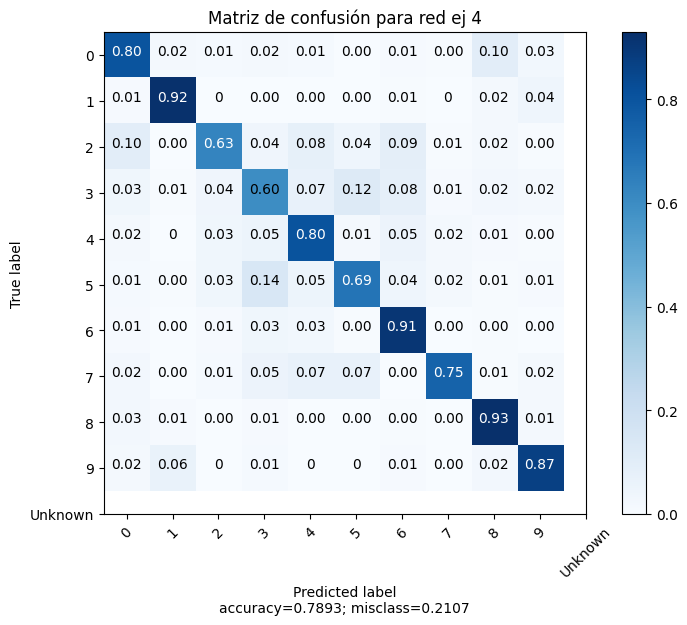

In [ ]:
matches_red_4 = model_red_4.predict(test_images)
matches_red_4 = matches_red_4.argmax(axis=1)
cm_sim_2_5 = tfsim_visualization.confusion_matrix(
    matches_red_4,
    test_labels,
    labels=labels,
    title="Matriz de confusión para red ej 4",
)